# 다항 회귀(Polynomial Regression)
- 직선이 아닌 2차 이상의 다항식으로 표현, 선형 회귀이다
- PolynomialFeatures 클래스로 feature 변환

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

X = np.arange(4).reshape(2, 2)
print(X) # [[x1, x2], [x3, x4]]

poly = PolynomialFeatures(degree=2)
poly.fit(X)
polt_ftr = poly.transform(X) # [1, x1, x2, x1^2, x1*x2, x2^2] 형태
print(polt_ftr)

[[0 1]
 [2 3]]
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


## y = 1 + 2x1 + 3x1^2 + 4x2^3

In [13]:
def polynomial_func(X):
    y = 1 + 2 * X[:,0] + 3 * X[:,0]**2 + 4 * X[:,1]**3
    return y

X = np.arange(4).reshape(2, 2)
print(X)
y = polynomial_func(X)
print(y)

[[0 1]
 [2 3]]
[  5 125]


## 다항식의 차수가 높으면 매우 복잡한 피처 간의 관계를 모델링 할 수 있지만, 과적합(overfitting)의 문제가 발생

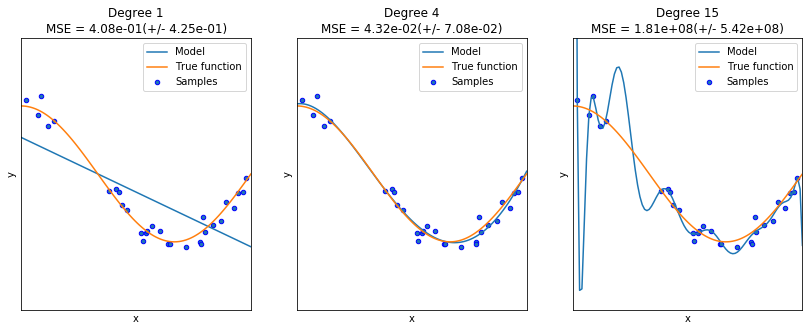

In [19]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()